In [1]:
!pip install google-cloud-bigquery
!pip install google-cloud-storage


In [2]:
from google.cloud import bigquery
from google.cloud import storage

# Initialize BigQuery and Storage clients
bigquery_client = bigquery.Client()
storage_client = storage.Client()

print("Authentication successful!")
client = bigquery.Client()
storage_client = storage.Client()


Authentication successful!


In [3]:
gcs_uri = "gs://samplebucketvrs/synthetic_beverage_sales_data.csv"


In [4]:
job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.CSV,  # Change to PARQUET, JSON, etc., as needed
    skip_leading_rows=1,                      # Adjust if the file has headers
    autodetect=True                           # Automatically infer the schema
)
from google.cloud import bigquery

# Replace with your values
project_id = "Big-data-engin"  # Your Google Cloud Project ID
dataset_id = "Sample1"  # Your BigQuery Dataset ID
table_id = "beverages"      # Your BigQuery Table ID

# Create a reference to the table
client = bigquery.Client()
dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)


In [5]:
load_job = client.load_table_from_uri(
    gcs_uri, table_ref, job_config=job_config
)

# Wait for the job to complete
load_job.result()
print(f"Loaded {load_job.output_rows} rows into {dataset_id}.{table_id}.")


Loaded 8999910 rows into Sample1.beverages.


In [9]:
from google.cloud import bigquery

# Initialize the BigQuery client
client = bigquery.Client()

# Specify the table ID in the format `project_id.dataset_id.table_id`
table_id = "big-data-engin.Sample1.beverages"  # Replace 'project_id' with your actual project ID

# Load the table into a pandas DataFrame
table = client.get_table(table_id)  # Fetch table metadata
df = client.list_rows(table).to_dataframe()  # Download table contents into a DataFrame

# Display the DataFrame
df.head(5)


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD2347054,CUS4738,B2B,Evian,Water,1.05,2,0.05,2.00,Niedersachsen,2021-03-22
1,ORD563995,CUS8657,B2B,Evian,Water,0.79,3,0.05,2.25,Sachsen,2022-11-23
2,ORD2947870,CUS1779,B2B,Evian,Water,0.98,3,0.15,2.50,Baden-Württemberg,2022-11-02
3,ORD1081625,CUS4654,B2B,Evian,Water,1.02,3,0.10,2.75,Sachsen-Anhalt,2022-04-06
4,ORD1885007,CUS4473,B2B,Evian,Water,0.92,4,0.05,3.50,Schleswig-Holstein,2021-03-04


In [7]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

In [8]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,17999820.00,17999820.00,17999820.00,17999820.00
mean,5.82,23.14,0.03,130.74
std,14.70,26.89,0.04,509.69
min,0.32,1.00,0.00,0.30
25%,1.05,6.00,0.00,8.40
50%,1.75,11.00,0.00,21.14
75%,3.21,30.00,0.05,69.49
max,169.53,100.00,0.15,14295.30


In [13]:
for col in ["Customer_Type", "Product", "Category", "Region"]:
    print(f"{col}: {df[col].nunique()} unique values")

Customer_Type: 2 unique values
Product: 47 unique values
Category: 4 unique values
Region: 16 unique values


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Product'] = label_encoder.fit_transform(df['Product'])
df['Region'] = label_encoder.fit_transform(df['Region'])

In [11]:
import pandas as pd

one_hot_encoded_df = pd.get_dummies(df, columns=["Customer_Type", "Category"])
one_hot_encoded_df.head()

,Order_ID,Customer_ID,Product,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,ORD2347054,CUS4738,9,1.05,2,0.05,2.00,8,2021-03-22,True,False,False,False,False,True
1,ORD563995,CUS8657,9,0.79,3,0.05,2.25,12,2022-11-23,True,False,False,False,False,True
2,ORD2947870,CUS1779,9,0.98,3,0.15,2.50,0,2022-11-02,True,False,False,False,False,True
3,ORD1081625,CUS4654,9,1.02,3,0.10,2.75,13,2022-04-06,True,False,False,False,False,True
4,ORD1885007,CUS4473,9,0.92,4,0.05,3.50,14,2021-03-04,True,False,False,False,False,True


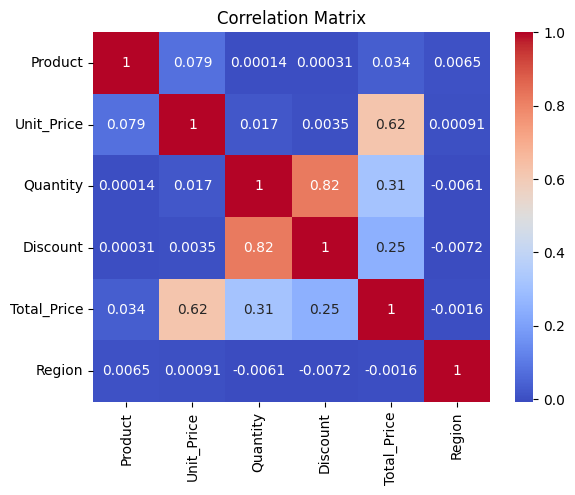

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numerical columns
numerical_columns = df.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [13]:
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor


# Sample 10% of the data for faster processing
sampled_df = one_hot_encoded_df.sample(frac=0.1, random_state=42)

# Drop unnecessary columns
sampled_df = sampled_df.drop(columns=["Order_ID", "Customer_ID", "Order_Date"])

# Separate features (X) and target (y)
y = sampled_df["Total_Price"]
X = sampled_df.drop(columns=["Total_Price"])

# Scale only numerical columns
numeric_cols = X.select_dtypes(include=["number"]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the ExtraTreesRegressor Model with parallel processing
extra_trees_model = ExtraTreesRegressor(random_state=42, n_jobs=-1, n_estimators=100)
extra_trees_model.fit(X_train, y_train)


# Get Feature Importances for ExtraTreesRegressor
extra_trees_feature_importances = extra_trees_model.feature_importances_
extra_trees_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': extra_trees_feature_importances
})
# Display Top 10 Features for ExtraTreesRegressor
print("ExtraTreesRegressor - Top 10 Features:")
print(extra_trees_importance_df.sort_values(by="Importance", ascending=False).head(10))



ExtraTreesRegressor - Top 10 Features:
                         Feature  Importance
1                     Unit_Price        0.51
2                       Quantity        0.31
7   Category_Alcoholic Beverages        0.05
5              Customer_Type_B2B        0.04
6              Customer_Type_B2C        0.04
3                       Discount        0.03
0                        Product        0.01
8                Category_Juices        0.00
10                Category_Water        0.00
4                         Region        0.00


In [15]:
# Define feature and target columns
features = ["Unit_Price", "Quantity", "Category_Alcoholic Beverages", "Customer_Type_B2C", "Discount"]
target = "Total_Price"

# Data sampling and preprocessing
sampled_data = one_hot_encoded_df.sample(frac=0.1, random_state=42).copy()
sampled_data.drop(columns=["Order_ID", "Customer_ID", "Order_Date"], inplace=True)

# Feature-target split
X = sampled_data[features]
y = sampled_data[target]

# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.base import BaseEstimator

# Base class for all models
class BaseModel(BaseEstimator):
    def __init__(self):
        self.model = None

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_train, X_test, y_train, y_test):
        self.train(X_train, y_train)
        y_pred = self.predict(X_test)
        return {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R²": r2_score(y_test, y_pred),
        }

# Specific model classes
class LinearRegressionModel(BaseModel):
    def __init__(self):
        super().__init__()
        self.model = LinearRegression()

class RidgeRegressionModel(BaseModel):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.model = Ridge(alpha=alpha)

class LassoRegressionModel(BaseModel):
    def __init__(self, alpha=0.1):
        super().__init__()
        self.model = Lasso(alpha=alpha)

class DecisionTreeModel(BaseModel):
    def __init__(self, max_depth=5):
        super().__init__()
        self.model = DecisionTreeRegressor(max_depth=max_depth)

class ExtraTreeModel(BaseModel):
    def __init__(self, random_state=42):
        super().__init__()
        self.model = ExtraTreeRegressor(random_state=random_state)

class RandomForestModel(BaseModel):
    def __init__(self, n_estimators=10):
        super().__init__()
        self.model = RandomForestRegressor(n_estimators=n_estimators, random_state=42, n_jobs=-1)

class GradientBoostingModel(BaseModel):
    def __init__(self, n_estimators=50):
        super().__init__()
        self.model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)

class ExtraTreeModel(BaseModel):
    def __init__(self, n_estimators=100):
        super().__init__()
        self.model = ExtraTreesRegressor(n_estimators=n_estimators, random_state=42, n_jobs=-1)
        
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)

class SupportVectorRegressorModel(BaseModel):
    def __init__(self, kernel="rbf"):
        super().__init__()
        self.model = SVR(kernel=kernel)

class KNearestNeighborsModel(BaseModel):
    def __init__(self, n_neighbors=5):
        super().__init__()
        self.model = KNeighborsRegressor(n_neighbors=n_neighbors)


# To evaluate all models, you can loop through them




In [17]:
def integrate_and_compare_results(results, model_name, metrics):
    """Integrates model evaluation metrics into a results list."""
    metrics["Model"] = model_name
    results.append(metrics)
results = []

In [18]:
# Example usage of one model
linear_model = LinearRegressionModel()
linear_metrics = linear_model.evaluate(X_train, X_test, y_train, y_test)
integrate_and_compare_results(results, "Linear Regression", linear_metrics)

In [19]:
# Example usage of one model
linear_model = RidgeRegressionModel(alpha=1.0)
linear_metrics = linear_model.evaluate(X_train, X_test, y_train, y_test)
integrate_and_compare_results(results, "RidgeRegression", linear_metrics)

In [20]:
# Example usage of one model
linear_model = LassoRegressionModel(alpha=0.1)
metrics = linear_model.evaluate(X_train, X_test, y_train, y_test)
integrate_and_compare_results(results, "LassoRegression", metrics)

In [22]:
# Example usage of one model
decision_tree_model = DecisionTreeModel(max_depth=5)  # Use the custom DecisionTreeModel class
metrics = decision_tree_model.evaluate(X_train, X_test, y_train, y_test)
integrate_and_compare_results(results, "DecisionTree", metrics)

In [21]:
# Example usage of one model
ExtraTreeRegressor_model = ExtraTreeModel(random_state=42)
metrics = ExtraTreeRegressor_model.evaluate(X_train, X_test, y_train, y_test)
integrate_and_compare_results(results, "ExtraTree", metrics)

In [23]:
# Example usage of one model
linear_model = RandomForestModel()
metrics = linear_model.evaluate(X_train, X_test, y_train, y_test)
integrate_and_compare_results(results, "RandomForest", metrics)

In [24]:
# Example usage of one model
linear_model = GradientBoostingModel()
metrics = linear_model.evaluate(X_train, X_test, y_train, y_test)
integrate_and_compare_results(results, "GradientBoosting", metrics)

In [26]:
results_df = pd.DataFrame(results)

# Print the results
print("\nModel Comparison:")
print(results_df)

# Find and print the best model based on R²
best_model = results_df.loc[results_df["R²"].idxmax()]
print(f"\nBest Model: {best_model['Model']} with R²: {best_model['R²']:.4f}")


Model Comparison:
     MAE       MSE   RMSE   R²              Model
0 141.32 133059.80 364.77 0.48  Linear Regression
1 141.32 133059.80 364.77 0.48    RidgeRegression
2 141.26 133059.43 364.77 0.48    LassoRegression
3   0.59     58.80   7.67 1.00          ExtraTree
4  28.73   9056.26  95.16 0.96       DecisionTree
5   0.47     35.28   5.94 1.00       RandomForest
6  18.01   2224.55  47.17 0.99   GradientBoosting

Best Model: RandomForest with R²: 0.9999


In [46]:
# Initialize the RandomForest model and retrain it if necessary
best_model_name = "ExtraTree"  # Assuming RandomForest is the best model from your results
if best_model_name == "ExtraTree":
    best_model = ExtraTreeModel(n_estimators=100)
    best_model.fit(X_train, y_train)  # Retrain the model if not already trained
    y_pred = best_model.predict(X_test)

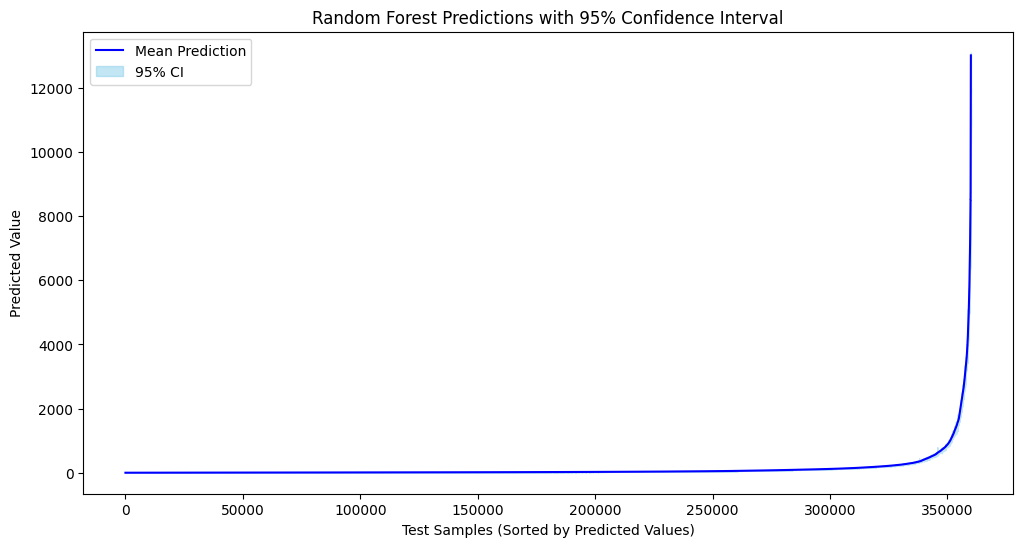

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Generate predictions from each tree in the RandomForest
all_tree_predictions = np.array([tree.predict(X_test) for tree in best_model.model.estimators_])

# Calculate the mean and confidence intervals
mean_predictions = np.mean(all_tree_predictions, axis=0)
lower_bound = np.percentile(all_tree_predictions, 2.5, axis=0)  # 2.5th percentile for 95% CI
upper_bound = np.percentile(all_tree_predictions, 97.5, axis=0)  # 97.5th percentile for 95% CI

# Sort for better visualization (optional)
sorted_indices = np.argsort(mean_predictions)
mean_predictions = mean_predictions[sorted_indices]
lower_bound = lower_bound[sorted_indices]
upper_bound = upper_bound[sorted_indices]

# Plot the predictions with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(mean_predictions, label="Mean Prediction", color="blue")
plt.fill_between(range(len(mean_predictions)), lower_bound, upper_bound, color="skyblue", alpha=0.5, label="95% CI")
plt.title("Random Forest Predictions with 95% Confidence Interval")
plt.xlabel("Test Samples (Sorted by Predicted Values)")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

In [50]:
print("Length of X_test_feature:", len(X_test_feature))
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
print("Length of lower_bound:", len(lower_bound))
print("Length of upper_bound:", len(upper_bound))


Length of X_test_feature: 359997
Length of y_test: 359997
Length of y_pred: 359997
Length of lower_bound: 359997
Length of upper_bound: 359997


359997


In [57]:
"""
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming X_test, y_test, and y_pred are already defined

# Select the first feature from X_test
if isinstance(X_test, pd.DataFrame):
    X_test_feature = X_test.iloc[:, 0]  # For pandas DataFrame
else:
    X_test_feature = X_test[:, 0]  # For NumPy arrays

# Calculate standard error for prediction intervals
residuals = y_test - y_pred
std_error = np.std(residuals, ddof=1)  # Unbiased standard deviation
confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the prediction intervals
lower_bound = y_pred - z_score * std_error
upper_bound = y_pred + z_score * std_error

# Find the minimum length among all arrays
min_length = min(len(X_test_feature), len(y_test), len(y_pred), len(lower_bound), len(upper_bound))

# Trim all arrays to the minimum length
X_test_feature = X_test_feature[:min_length]
y_test = y_test[:min_length]
y_pred = y_pred[:min_length]
lower_bound = lower_bound[:min_length]
upper_bound = upper_bound[:min_length]

# Create a DataFrame to store the results
prediction_df = pd.DataFrame({
    "Feature": X_test_feature,
    "Actual Values": y_test,
    "Predicted Values": y_pred,
    "Lower Bound (95%)": lower_bound,
    "Upper Bound (95%)": upper_bound
})

# Display the first few rows of the DataFrame
print(prediction_df.head())
"""

'\nimport pandas as pd\nimport numpy as np\nfrom scipy.stats import norm\n\n# Assuming X_test, y_test, and y_pred are already defined\n\n# Select the first feature from X_test\nif isinstance(X_test, pd.DataFrame):\n    X_test_feature = X_test.iloc[:, 0]  # For pandas DataFrame\nelse:\n    X_test_feature = X_test[:, 0]  # For NumPy arrays\n\n# Calculate standard error for prediction intervals\nresiduals = y_test - y_pred\nstd_error = np.std(residuals, ddof=1)  # Unbiased standard deviation\nconfidence_level = 0.95\nz_score = norm.ppf(1 - (1 - confidence_level) / 2)\n\n# Calculate the prediction intervals\nlower_bound = y_pred - z_score * std_error\nupper_bound = y_pred + z_score * std_error\n\n# Find the minimum length among all arrays\nmin_length = min(len(X_test_feature), len(y_test), len(y_pred), len(lower_bound), len(upper_bound))\n\n# Trim all arrays to the minimum length\nX_test_feature = X_test_feature[:min_length]\ny_test = y_test[:min_length]\ny_pred = y_pred[:min_length]\nlowe

Total Revenue by Region:
Region
5    164941543.96
6    156800220.38
11   156781174.30
10   151677353.98
7    151034494.32
15   150649730.94
2    149135855.06
1    145650798.36
8    143918101.04
12   143893982.76
0    143189677.80
9    142787607.40
3    142698062.22
14   140635658.76
13   139531087.24
4    130036978.18
Name: Total_Price, dtype: float64


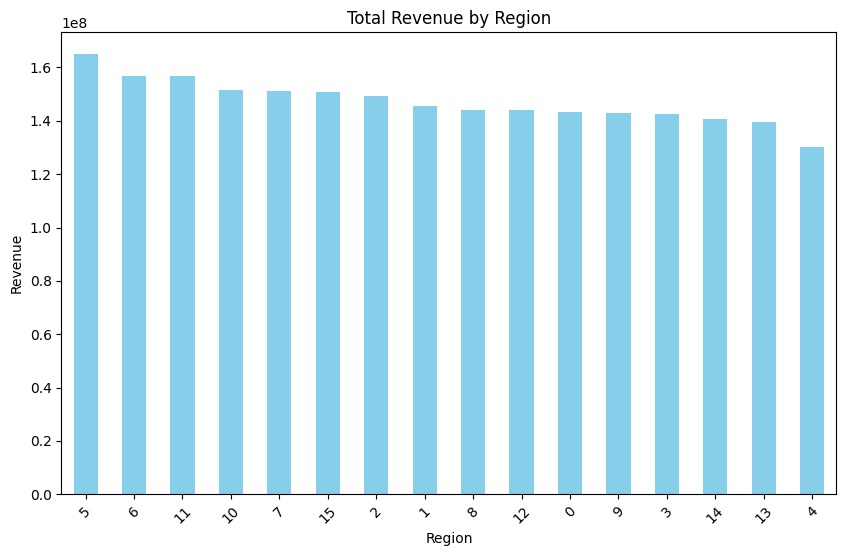


Top Performing Region: 5 with Revenue: 164941543.96


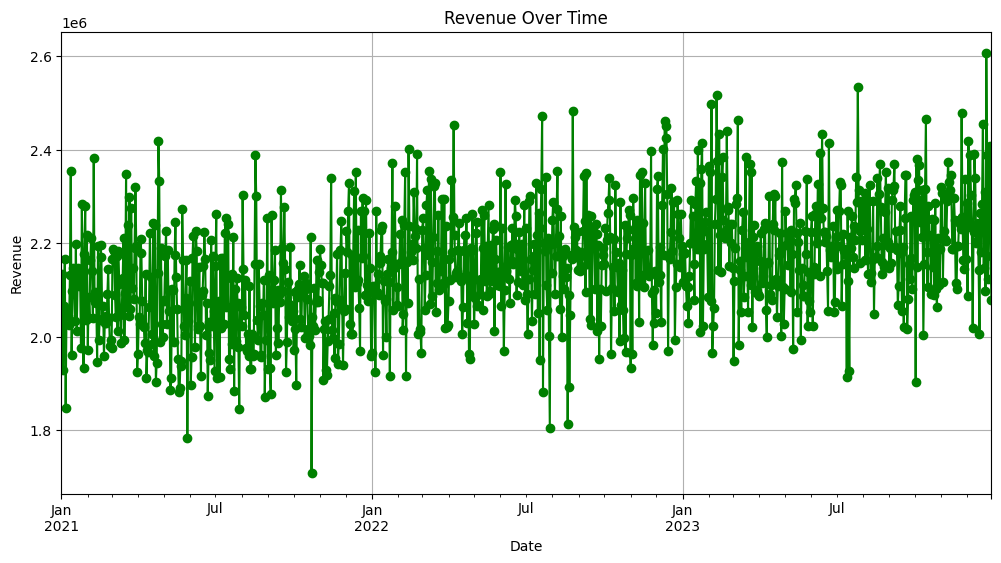

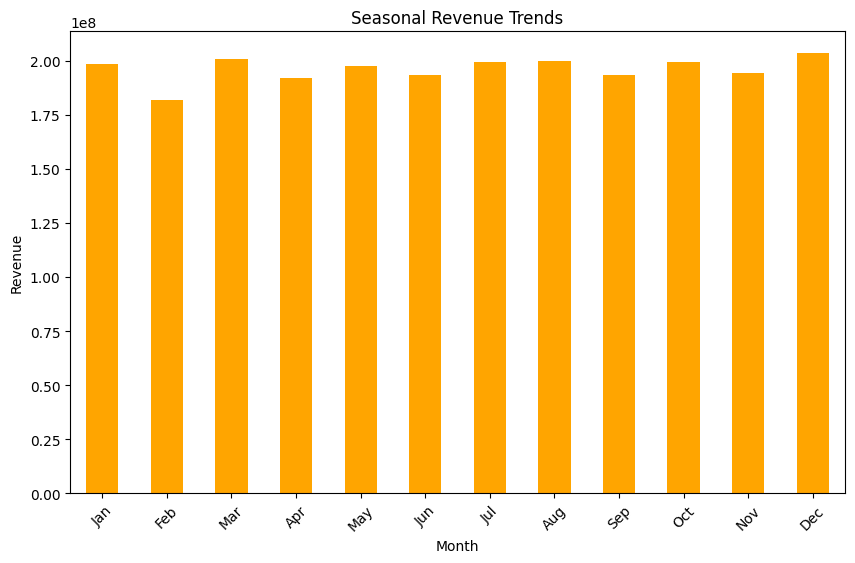

In [61]:
# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# 1. Total Revenue by Region
revenue_by_region = df.groupby('Region')['Total_Price'].sum().sort_values(ascending=False)
print("Total Revenue by Region:")
print(revenue_by_region)

# Plotting Total Revenue by Region
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.ylabel('Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

# 2. Top Performing Region
top_region = revenue_by_region.idxmax()
top_region_revenue = revenue_by_region.max()
print(f"\nTop Performing Region: {top_region} with Revenue: {top_region_revenue}")

# 3. Revenue Over Time
revenue_over_time = df.groupby('Order_Date')['Total_Price'].sum()

# Plotting Revenue Over Time
plt.figure(figsize=(12, 6))
revenue_over_time.plot(kind='line', marker='o', color='green')
plt.title('Revenue Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# 4. Seasonal Trends
df['Month'] = df['Order_Date'].dt.month
seasonal_trends = df.groupby('Month')['Total_Price'].sum()

# Plotting Seasonal Trends
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='orange')
plt.title('Seasonal Revenue Trends')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


Revenue by Customer_Type:
Customer_Type
B2B   1803239224.54
B2C    550123102.16
Name: Total_Price, dtype: float64


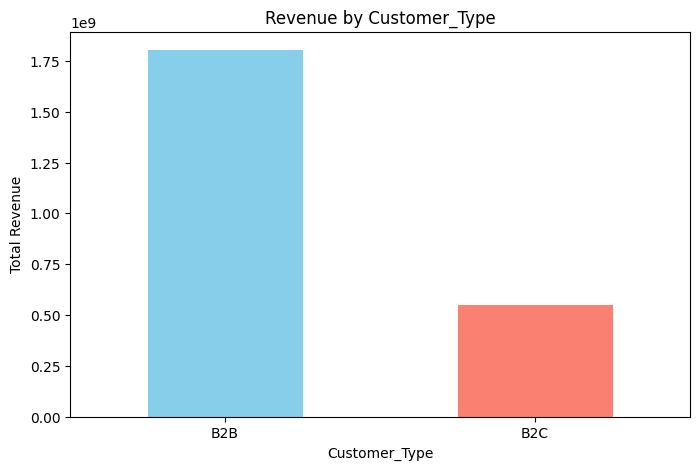


Revenue by Category:
Category
Alcoholic Beverages   1823595839.44
Juices                 266335697.28
Soft Drinks            165605085.06
Water                   97825704.92
Name: Total_Price, dtype: float64


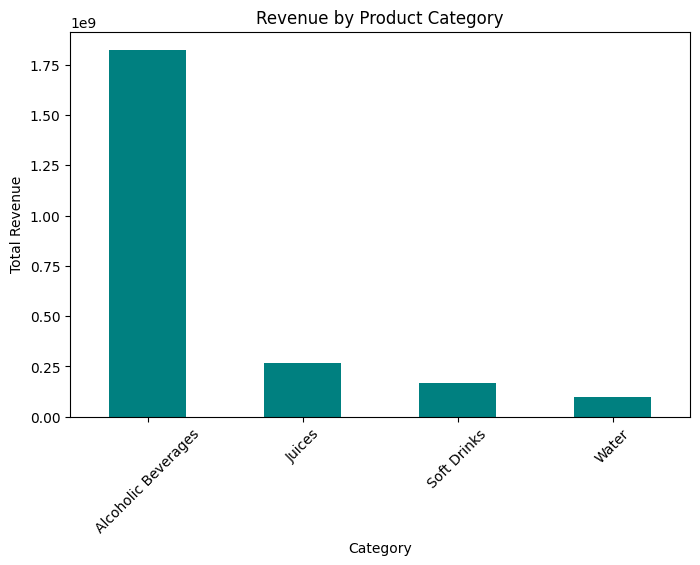


Revenue by Region (Top 5):
Region
5    164941543.96
6    156800220.38
11   156781174.30
10   151677353.98
7    151034494.32
Name: Total_Price, dtype: float64


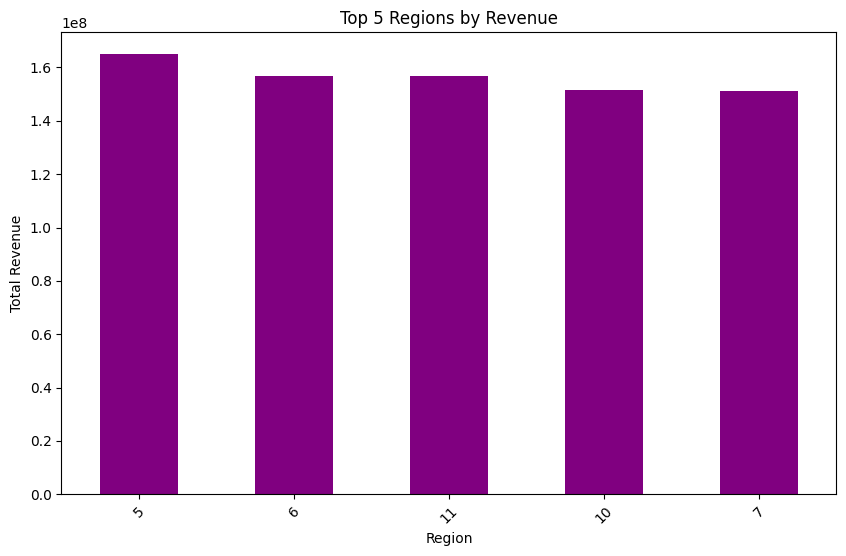


Top 10 Products by Revenue:
Product
41   405163796.84
26   350176172.42
18   194523601.80
16   191762005.74
39   172287311.18
2    116935008.74
14   116093928.48
35    46638350.12
7     46089661.96
31    45322561.28
Name: Total_Price, dtype: float64


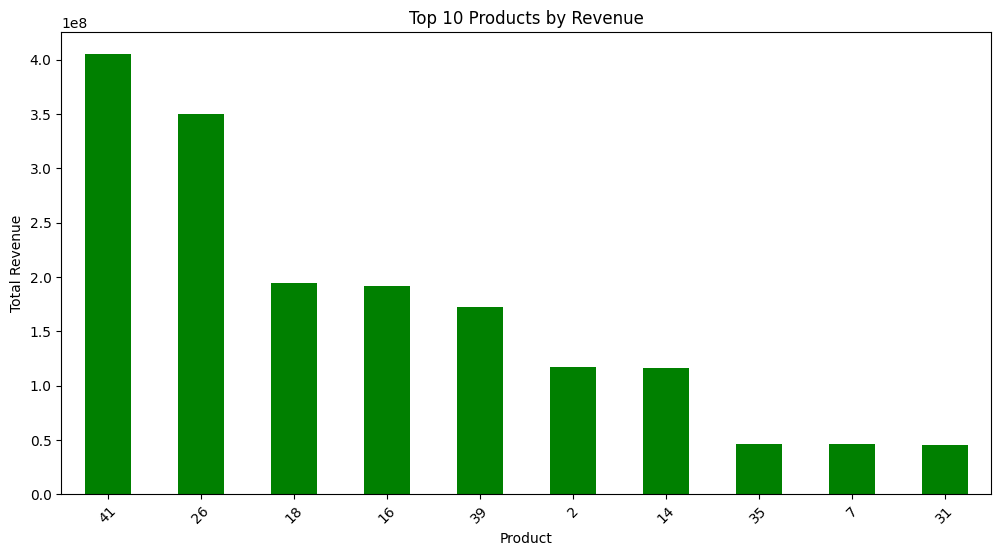

In [62]:
# 2. Revenue by Customer_Type
revenue_by_customer_type = df.groupby('Customer_Type')['Total_Price'].sum()
print("Revenue by Customer_Type:")
print(revenue_by_customer_type)

# Plotting Revenue by Customer_Type
plt.figure(figsize=(8, 5))
revenue_by_customer_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Revenue by Customer_Type')
plt.ylabel('Total Revenue')
plt.xlabel('Customer_Type')
plt.xticks(rotation=0)
plt.show()

# 3. Revenue by Product Category
revenue_by_category = df.groupby('Category')['Total_Price'].sum()
print("\nRevenue by Category:")
print(revenue_by_category)

# Plotting Revenue by Category
plt.figure(figsize=(8, 5))
revenue_by_category.plot(kind='bar', color='teal')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

# 4. Revenue by Region
revenue_by_region = df.groupby('Region')['Total_Price'].sum().sort_values(ascending=False)
print("\nRevenue by Region (Top 5):")
print(revenue_by_region.head(5))

# Plotting Top 5 Regions by Revenue
plt.figure(figsize=(10, 6))
revenue_by_region.head(5).plot(kind='bar', color='purple')
plt.title('Top 5 Regions by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

# 5. Revenue by Product
top_10_products = df.groupby('Product')['Total_Price'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Revenue:")
print(top_10_products)

# Plotting Top 10 Products by Revenue
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='green')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.show()

Total Repeat Customers: 10000


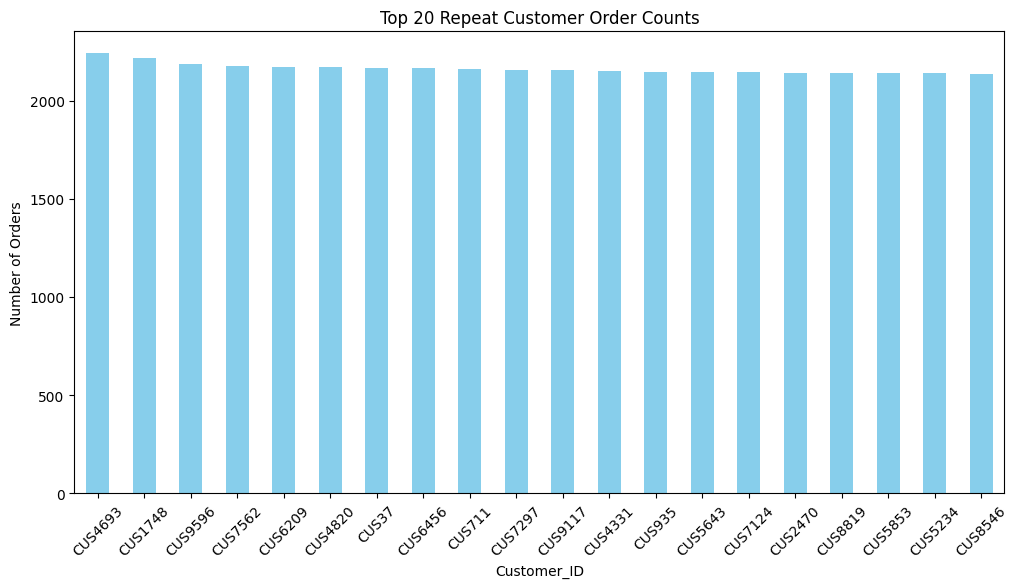

Average Purchase Volume per Customer:
count   10000.00
mean       23.15
std        20.37
min         7.40
25%         7.96
50%         8.11
75%        50.01
max        54.04
Name: Quantity, dtype: Float64


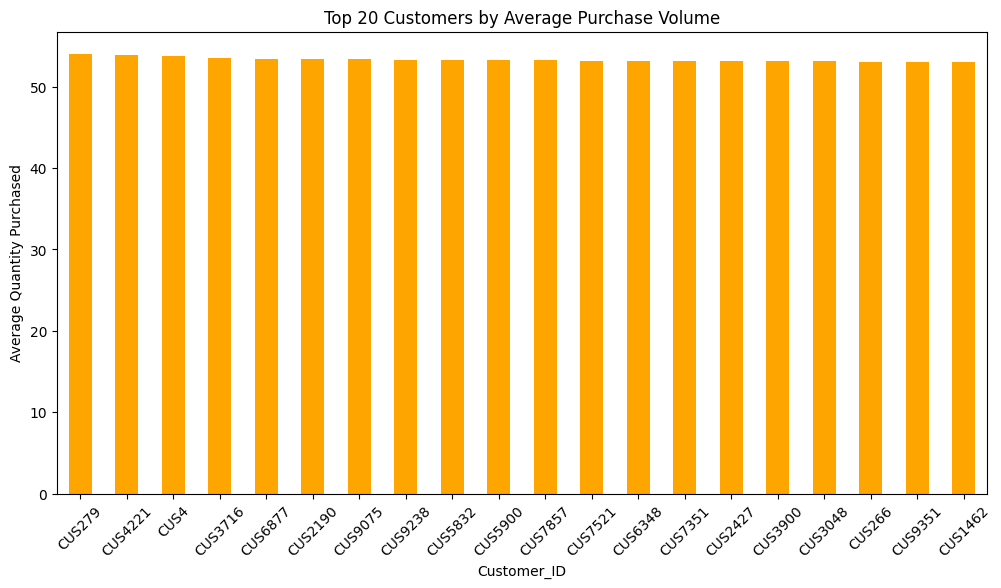

In [64]:
# Filter for repeat customers (customers with > 1 order)
repeat_customers = customer_order_counts[customer_order_counts > 1]
print(f"Total Repeat Customers: {len(repeat_customers)}")

# Plotting Repeat Customers (Top 20 for visualization)
top_repeat_customers = repeat_customers.head(20)
plt.figure(figsize=(12, 6))
top_repeat_customers.plot(kind='bar', color='skyblue')
plt.title('Top 20 Repeat Customer Order Counts')
plt.ylabel('Number of Orders')
plt.xlabel('Customer_ID')
plt.xticks(rotation=45)
plt.show()

# 2. Average Purchase Volume per Customer
avg_purchase_volume = df.groupby('Customer_ID')['Quantity'].mean()

# Display statistics for average purchase volume
print(f"Average Purchase Volume per Customer:\n{avg_purchase_volume.describe()}")

# Plotting Average Purchase Volume (Top 20 customers for visualization)
top_avg_volume = avg_purchase_volume.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
top_avg_volume.plot(kind='bar', color='orange')
plt.title('Top 20 Customers by Average Purchase Volume')
plt.ylabel('Average Quantity Purchased')
plt.xlabel('Customer_ID')
plt.xticks(rotation=45)
plt.show()


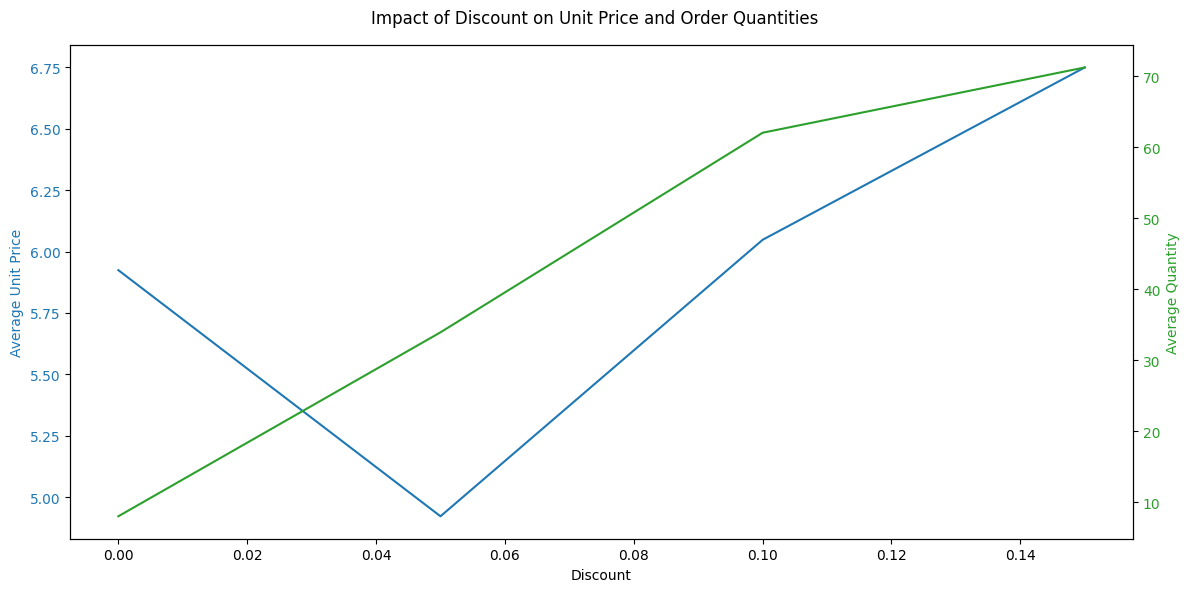

Correlation Between Discount and Total Price: 0.25


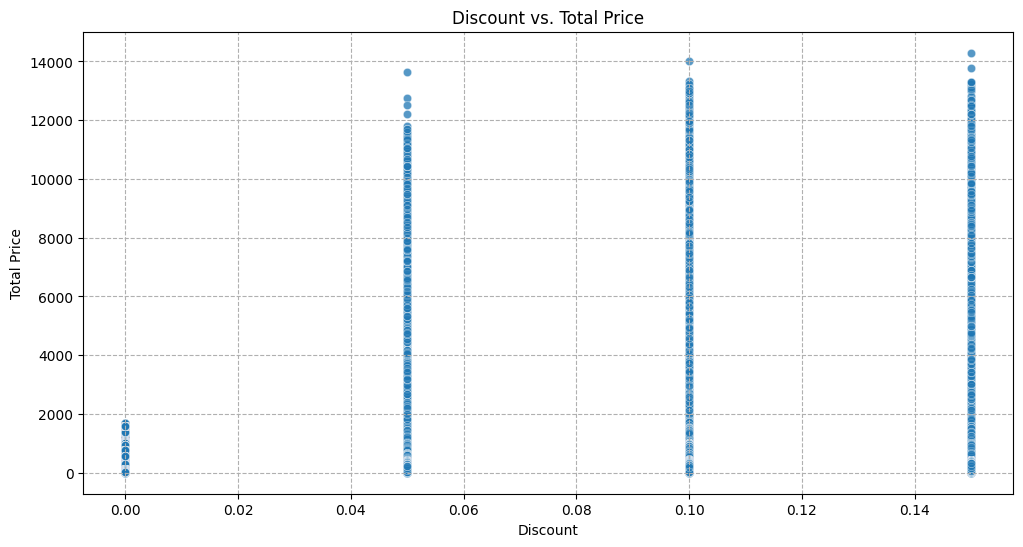

Year-over-Year Growth:
Year
2021   0.00
2022   3.90
2023   1.75
Name: Total_Price, dtype: float64


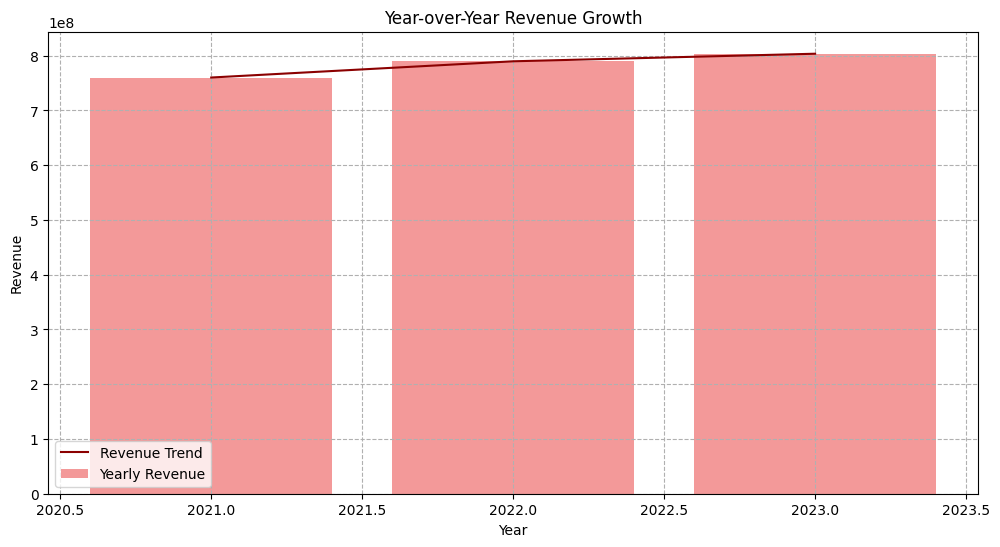

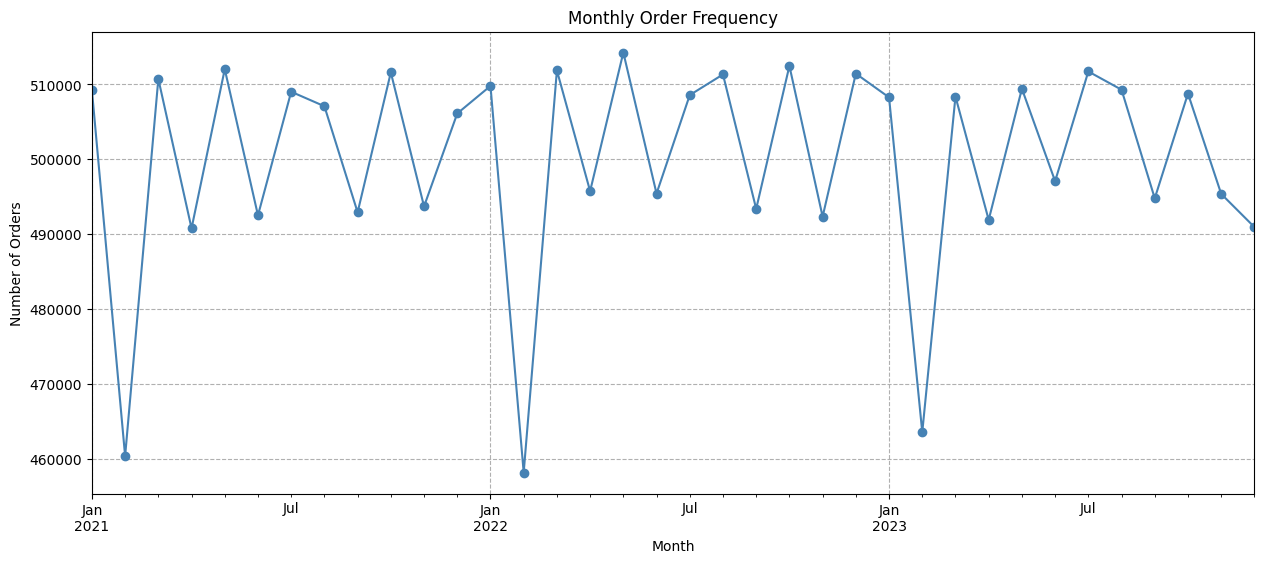

In [65]:
# 1. Impact of Discount on Unit Price
# Group by Discount and calculate the average Unit Price and average Quantity
discount_unit_price = df.groupby('Discount').agg({'Unit_Price': 'mean', 'Quantity': 'mean'}).reset_index()

# Plotting Discount vs Average Unit Price and Quantity
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Discount')
ax1.set_ylabel('Average Unit Price', color=color)
ax1.plot(discount_unit_price['Discount'], discount_unit_price['Unit_Price'], color=color, label='Avg. Unit Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Quantity', color=color)
ax2.plot(discount_unit_price['Discount'], discount_unit_price['Quantity'], color=color, label='Avg. Quantity')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Impact of Discount on Unit Price and Order Quantities')
fig.tight_layout()
plt.show()

# 2. Correlation Between Discount and Total Price
correlation = df[['Discount', 'Total_Price']].corr().iloc[0, 1]
print(f"Correlation Between Discount and Total Price: {correlation:.2f}")

# Scatter Plot for Discount vs. Total Price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Discount', y='Total_Price', alpha=0.5)
plt.title('Discount vs. Total Price')
plt.xlabel('Discount')
plt.ylabel('Total Price')
plt.grid(True, linestyle='--')
plt.show()

# 3. Year-over-Year Growth
# Extract Year from Order_Date
df['Year'] = df['Order_Date'].dt.year
yearly_revenue = df.groupby('Year')['Total_Price'].sum()

# Calculate YoY Growth
yoy_growth = yearly_revenue.pct_change().fillna(0) * 100
print("Year-over-Year Growth:")
print(yoy_growth)

# Plotting Yearly Revenue and Growth
plt.figure(figsize=(12, 6))
plt.bar(yearly_revenue.index, yearly_revenue.values, color='lightcoral', alpha=0.8, label='Yearly Revenue')
plt.plot(yearly_revenue.index, yearly_revenue.values, color='darkred', label='Revenue Trend')
plt.title('Year-over-Year Revenue Growth')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

# 4. Monthly Order Frequency
# Extract Year-Month from Order_Date
df['YearMonth'] = df['Order_Date'].dt.to_period('M')
monthly_orders = df.groupby('YearMonth')['Order_ID'].count()

# Plotting Monthly Order Frequency
plt.figure(figsize=(15, 6))
monthly_orders.plot(kind='line', marker='o', color='steelblue')
plt.title('Monthly Order Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--')
plt.show()

Category-Level Sales:
 Category
Alcoholic Beverages   1823595839.44
Juices                 266335697.28
Soft Drinks            165605085.06
Water                   97825704.92
Name: Total_Price, dtype: float64


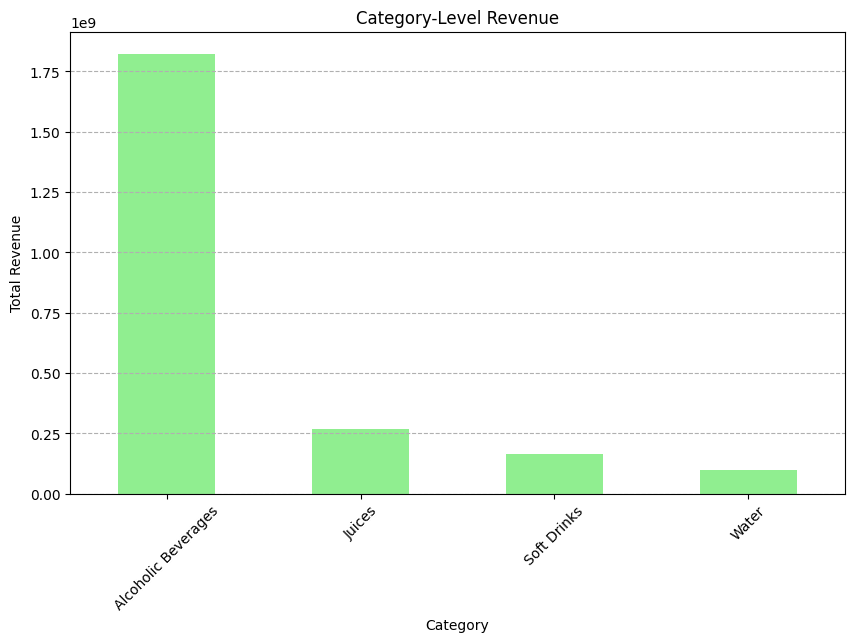

Average Unit Price by Region:
 Region
4    5.11
10   5.69
9    5.76
13   5.76
7    5.85
11   5.87
14   5.88
12   5.88
3    5.89
0    5.90
1    5.90
6    5.91
15   5.92
8    5.92
2    5.93
5    5.94
Name: Unit_Price, dtype: float64


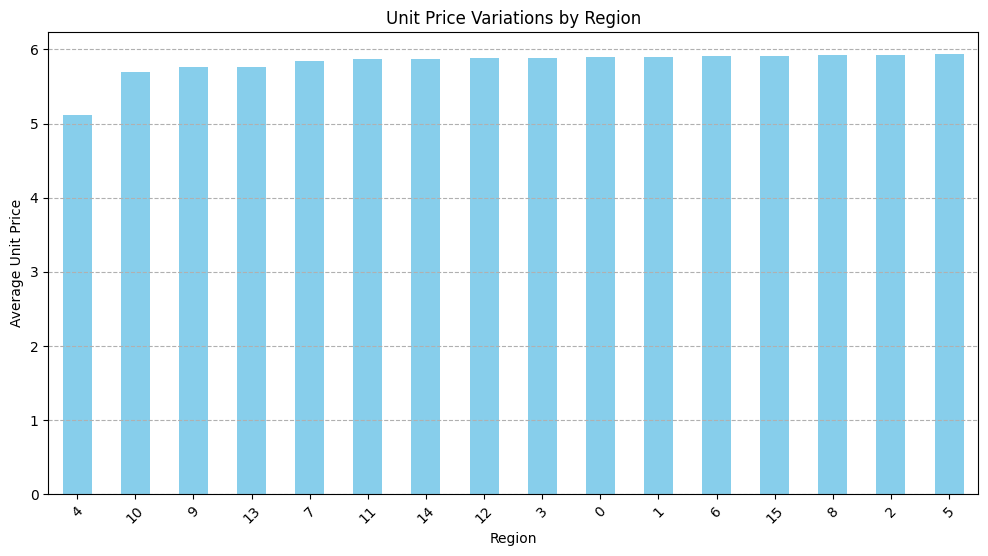

In [66]:
# 6.1. Category-Level Sales
category_sales = df.groupby('Category')['Total_Price'].sum().sort_values(ascending=False)
print("Category-Level Sales:\n", category_sales)

# Plotting Category-Level Sales
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='lightgreen')
plt.title('Category-Level Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

# 6.2. Unit Price Variations by Region
region_unit_price = df.groupby('Region')['Unit_Price'].mean().sort_values()
print("Average Unit Price by Region:\n", region_unit_price)

# Plotting Unit Price by Region
plt.figure(figsize=(12, 6))
region_unit_price.plot(kind='bar', color='skyblue')
plt.title('Unit Price Variations by Region')
plt.ylabel('Average Unit Price')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


Regional Pricing Trends:
         Unit_Price  Discount
Region                      
0             5.90      0.03
1             5.90      0.03
2             5.93      0.03
3             5.89      0.03
4             5.11      0.03
5             5.94      0.03
6             5.91      0.03
7             5.85      0.03
8             5.92      0.03
9             5.76      0.03
10            5.69      0.03
11            5.87      0.03
12            5.88      0.03
13            5.76      0.03
14            5.88      0.03
15            5.92      0.03


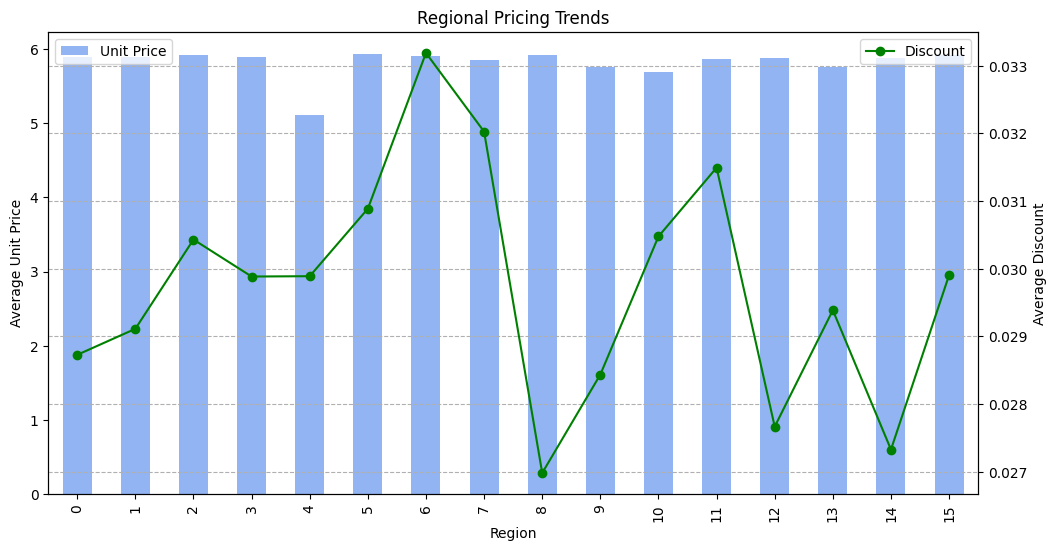

Regional Preferences:
         Quantity  Total_Price
Region                       
0       25049340 143189677.80
1       25358978 145650798.36
2       25738792 149135855.06
3       24787826 142698062.22
4       26372650 130036978.18
5       28655142 164941543.96
6       27288020 156800220.38
7       26489916 151034494.32
8       25091322 143918101.04
9       25573298 142787607.40
10      27193550 151677353.98
11      27570176 156781174.30
12      25293068 143893982.76
13      25079328 139531087.24
14      24804118 140635658.76
15      26136718 150649730.94


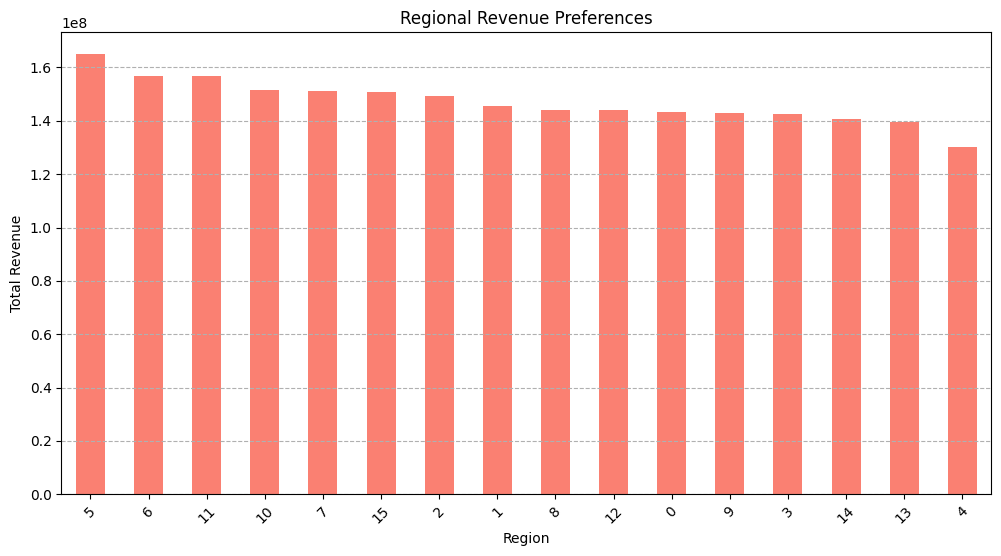

In [67]:
# 7.1. Regional Pricing Trends
regional_pricing = df.groupby('Region').agg({'Unit_Price': 'mean', 'Discount': 'mean'})
print("Regional Pricing Trends:\n", regional_pricing)

# Plotting Regional Pricing Trends
fig, ax = plt.subplots(figsize=(12, 6))
regional_pricing['Unit_Price'].plot(kind='bar', ax=ax, color='cornflowerblue', alpha=0.7, label='Unit Price')
ax.set_ylabel('Average Unit Price')
ax.set_title('Regional Pricing Trends')
ax.legend(loc='upper left')

ax2 = ax.twinx()
regional_pricing['Discount'].plot(kind='line', ax=ax2, color='green', marker='o', label='Discount')
ax2.set_ylabel('Average Discount')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

# 7.2. Regional Preferences
regional_preferences = df.groupby('Region').agg({'Quantity': 'sum', 'Total_Price': 'sum'})
print("Regional Preferences:\n", regional_preferences)

# Plotting Regional Preferences
plt.figure(figsize=(12, 6))
regional_preferences['Total_Price'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Regional Revenue Preferences')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


B2B Product-Level Trends:
          Quantity  Total_Price
Product                       
26        4114780 279087586.16
41        4115424 275057167.26
18        4115536 150845352.64
16        4151540 132132434.74
39        4112112 131074092.58
14        4134572 100642223.40
2         4131080 100564216.86
31        4487196  39858271.64
4         4165102  36387197.08
35        4142324  36160789.36
22        4139724  36053327.22
7        11472458  34368491.14
27       11460280  34367739.10
21       11418148  34244186.20
33        4577046  29165809.14
40       11518452  28620245.86
29       11434128  28389372.72
15       12106612  23818403.10
13       11486978  19932946.30
11        8006232  18539119.88
30        6485956  16941435.38
32        6447738  16794306.98
24        6413576  16741894.36
5         6439162  12967633.66
45        8928518  10882259.30
42        8938648  10872976.88
9         8920916  10108203.38
8         4203808   8460403.68
1         4150332   8178398.08
34        92

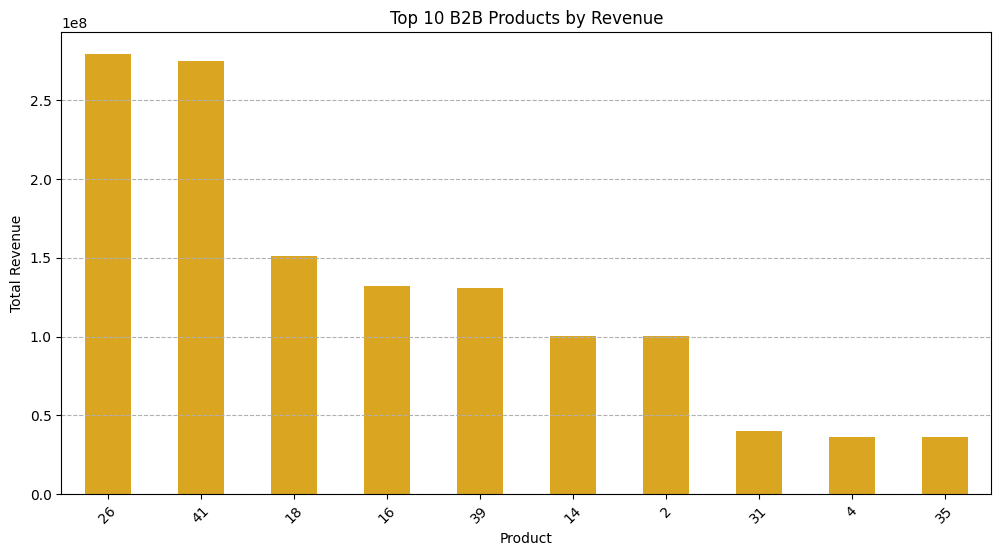

Average Purchase Volume per Customer Type:
 Customer_Type
B2B   50.52
B2C    8.00
Name: Quantity, dtype: Float64


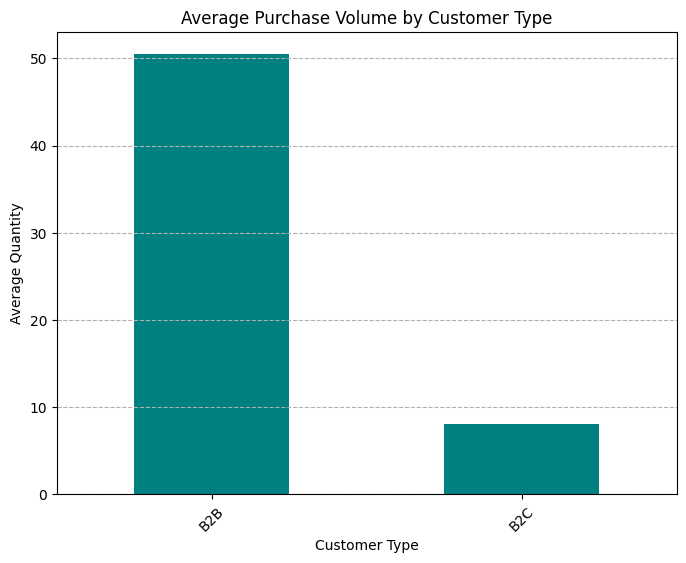

In [68]:
# 8.1. B2B Purchase Patterns
b2b_data = df[df['Customer_Type'] == 'B2B']
b2b_trends = b2b_data.groupby('Product').agg({'Quantity': 'sum', 'Total_Price': 'sum'}).sort_values(by='Total_Price', ascending=False)
print("B2B Product-Level Trends:\n", b2b_trends)

# Plotting B2B Purchase Patterns (Top 10 Products)
plt.figure(figsize=(12, 6))
b2b_trends['Total_Price'].head(10).plot(kind='bar', color='goldenrod')
plt.title('Top 10 B2B Products by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

# 8.2. Purchase Volume per Customer Type
customer_type_volume = df.groupby('Customer_Type')['Quantity'].mean()
print("Average Purchase Volume per Customer Type:\n", customer_type_volume)

# Plotting Purchase Volume per Customer Type
plt.figure(figsize=(8, 6))
customer_type_volume.plot(kind='bar', color='teal')
plt.title('Average Purchase Volume by Customer Type')
plt.ylabel('Average Quantity')
plt.xlabel('Customer Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


Revenue by Discount Rate:
 Discount
0.10   985935520.92
0.00   550123102.16
0.05   492232607.44
0.15   325071096.18
Name: Total_Price, dtype: float64


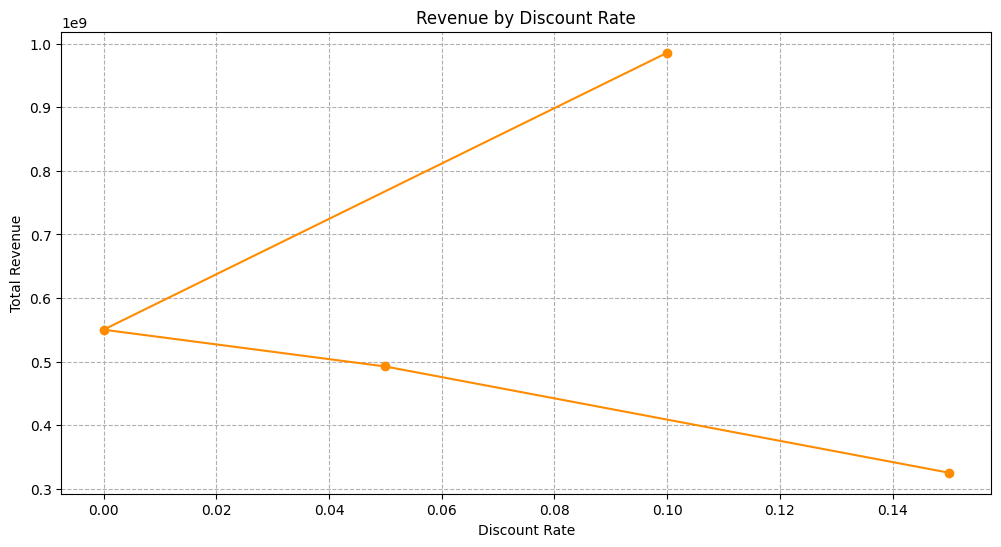

Average Quantity by Discount Rate:
 Discount
0.00    8.00
0.05   33.93
0.10   62.05
0.15   71.26
Name: Quantity, dtype: Float64


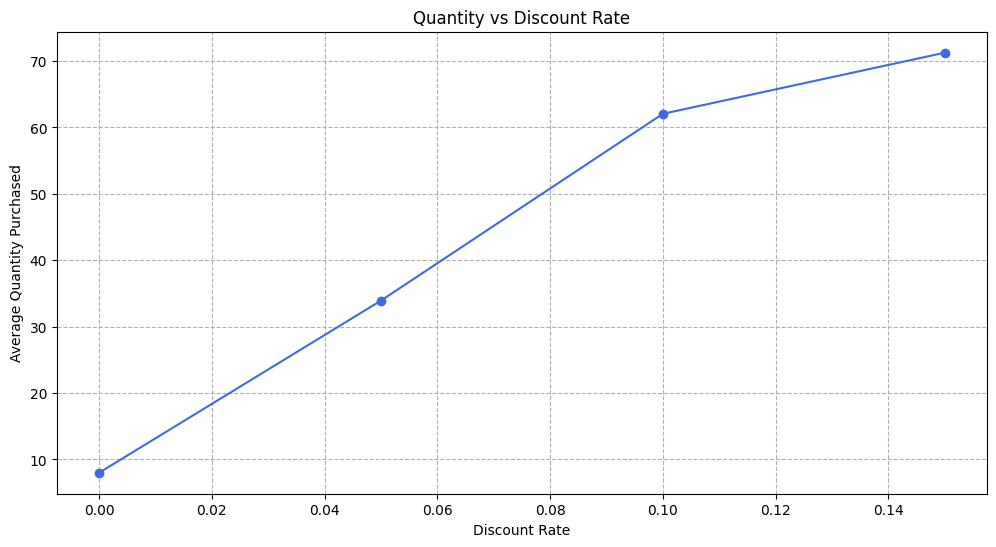

In [69]:
# 9.1. Optimal Discount Rate
discount_revenue = df.groupby('Discount')['Total_Price'].sum().sort_values(ascending=False)
print("Revenue by Discount Rate:\n", discount_revenue)

# Plotting Discount Rate vs Revenue
plt.figure(figsize=(12, 6))
discount_revenue.plot(kind='line', marker='o', color='darkorange')
plt.title('Revenue by Discount Rate')
plt.xlabel('Discount Rate')
plt.ylabel('Total Revenue')
plt.grid(axis='both', linestyle='--')
plt.show()

# 9.2. Quantity and Discount Relationship
discount_quantity = df.groupby('Discount')['Quantity'].mean()
print("Average Quantity by Discount Rate:\n", discount_quantity)

# Plotting Discount Rate vs Quantity
plt.figure(figsize=(12, 6))
discount_quantity.plot(kind='line', marker='o', color='royalblue')
plt.title('Quantity vs Discount Rate')
plt.xlabel('Discount Rate')
plt.ylabel('Average Quantity Purchased')
plt.grid(axis='both', linestyle='--')
plt.show()


Daily Order Frequency Summary:
 count    1094.00
mean    16453.22
std       360.02
min     15400.00
25%     16198.50
50%     16447.00
75%     16702.00
max     17498.00
Name: count, dtype: float64
Weekly Order Frequency Summary:
 count      157.00
mean    114648.54
std       5479.96
min      49230.00
25%     114476.00
50%     115154.00
75%     115784.00
max     117388.00
Name: count, dtype: float64
Monthly Order Frequency Summary:
 count       36.00
mean    499995.00
std      14466.32
min     458172.00
25%     493251.00
50%     507657.00
75%     510009.50
max     514236.00
Name: count, dtype: float64


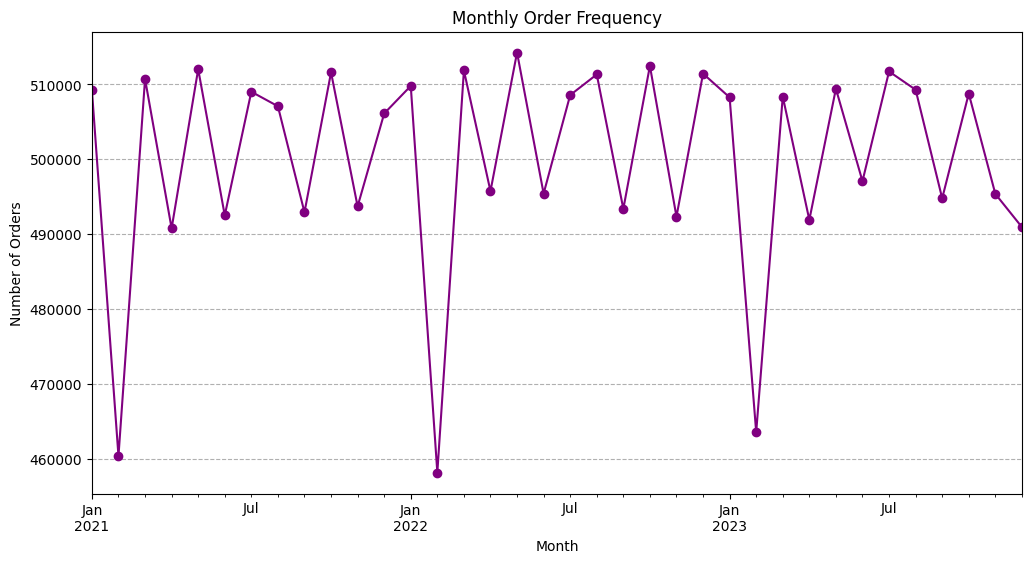

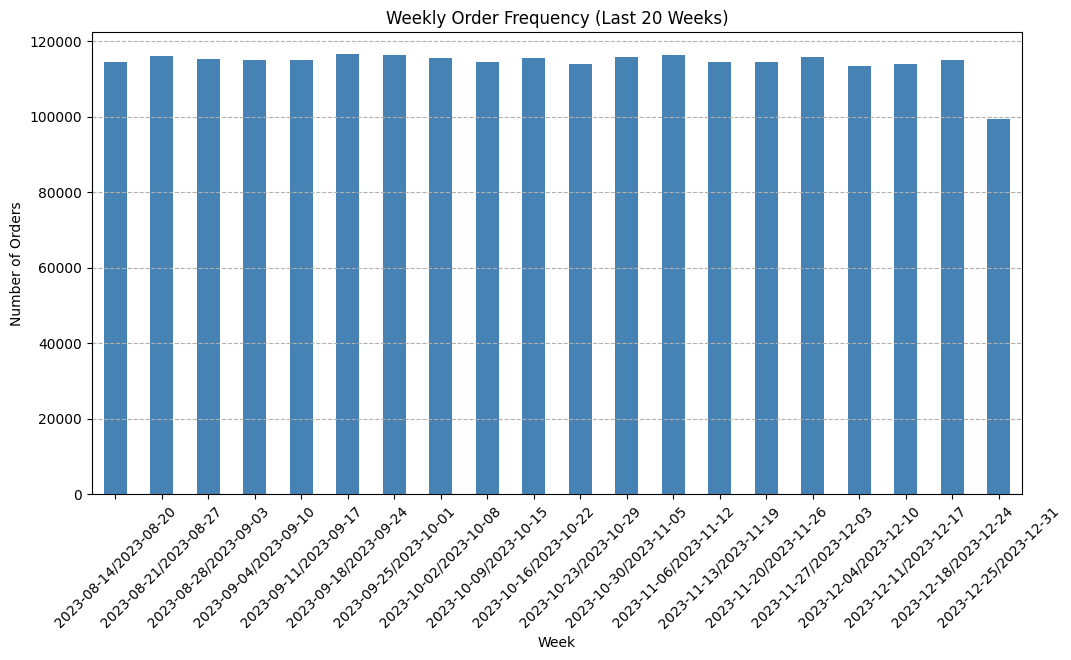

In [70]:
# 10.1.1. Daily, Weekly, and Monthly Order Frequency
order_frequency = df['Order_Date'].dt.to_period('D').value_counts().sort_index()
weekly_frequency = df['Order_Date'].dt.to_period('W').value_counts().sort_index()
monthly_frequency = df['Order_Date'].dt.to_period('M').value_counts().sort_index()

# Summary of Order Frequencies
print("Daily Order Frequency Summary:\n", order_frequency.describe())
print("Weekly Order Frequency Summary:\n", weekly_frequency.describe())
print("Monthly Order Frequency Summary:\n", monthly_frequency.describe())

# Plotting Monthly Order Frequency
plt.figure(figsize=(12, 6))
monthly_frequency.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Order Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--')
plt.show()

# Plotting Weekly Order Frequency (Zooming into recent weeks)
plt.figure(figsize=(12, 6))
weekly_frequency.tail(20).plot(kind='bar', color='steelblue')
plt.title('Weekly Order Frequency (Last 20 Weeks)')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()


Unit_Price Outliers: 2196808
Unit_Price Bounds: Lower=-2.19, Upper=6.45
Quantity Outliers: 2180086
Quantity Bounds: Lower=-30.0, Upper=66.0
Discount Outliers: 762034
Discount Bounds: Lower=-0.08, Upper=0.12


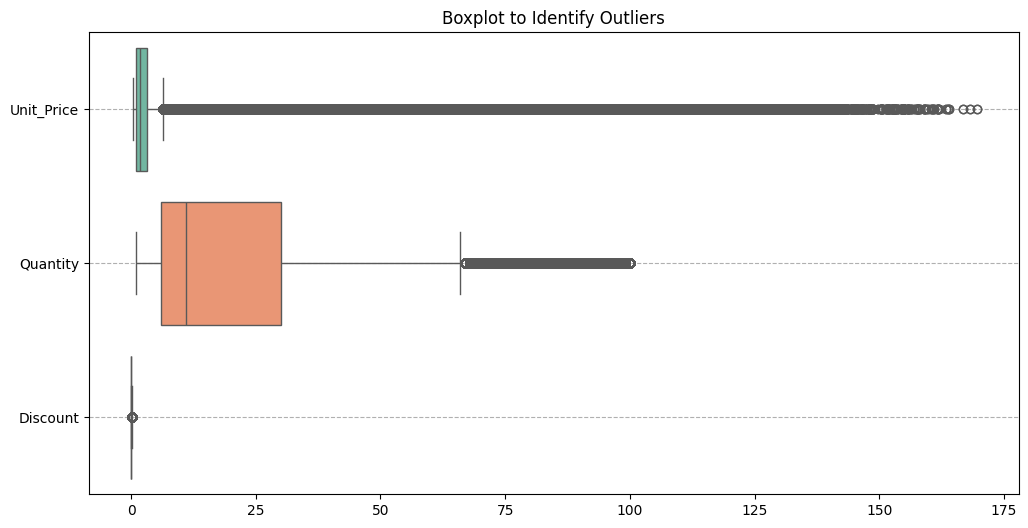

In [71]:
# Function to detect outliers based on IQR
def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# 10.2.1 Outliers in Unit_Price
unit_price_outliers, up_lower, up_upper = detect_outliers(df, 'Unit_Price')
print(f"Unit_Price Outliers: {len(unit_price_outliers)}")
print(f"Unit_Price Bounds: Lower={up_lower:.2f}, Upper={up_upper:.2f}")

# 10.2.2 Outliers in Quantity
quantity_outliers, q_lower, q_upper = detect_outliers(df, 'Quantity')
print(f"Quantity Outliers: {len(quantity_outliers)}")
print(f"Quantity Bounds: Lower={q_lower}, Upper={q_upper}")

# 10.2.3 Outliers in Discount
discount_outliers, d_lower, d_upper = detect_outliers(df, 'Discount')
print(f"Discount Outliers: {len(discount_outliers)}")
print(f"Discount Bounds: Lower={d_lower:.2f}, Upper={d_upper:.2f}")

# Visualizing Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Unit_Price', 'Quantity', 'Discount']], orient='h', palette='Set2')
plt.title('Boxplot to Identify Outliers')
plt.grid(axis='y', linestyle='--')
plt.show()
